# 4. Search for hyperparameters that can produce higher accuracy

In [1]:
# coding: utf-8
'''
    Initial setting. Please do not change this cell
'''
%matplotlib inline
import numpy as np # Import numpy library
import matplotlib.pyplot as plt # Draw graph
import os, sys
sys.path.append(os.pardir)  # Settings for importing files in parent directory
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer2

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True) # Read Test Data

## 4-1. Setting hyperparameters and executing training, confirming accuracy

=== epoch:1, train acc:0.104416666667, test acc:0.1028 ===
=== epoch:2, train acc:0.39085, test acc:0.4021 ===
=== epoch:3, train acc:0.5324, test acc:0.5423 ===
=== epoch:4, train acc:0.5867, test acc:0.5929 ===
=== epoch:5, train acc:0.634183333333, test acc:0.6427 ===
=== epoch:6, train acc:0.678333333333, test acc:0.6865 ===
=== epoch:7, train acc:0.714583333333, test acc:0.7245 ===
=== epoch:8, train acc:0.74535, test acc:0.7519 ===
=== epoch:9, train acc:0.775383333333, test acc:0.7838 ===
=== epoch:10, train acc:0.800416666667, test acc:0.8059 ===
=============== Final Test Accuracy ===============
test acc:0.821


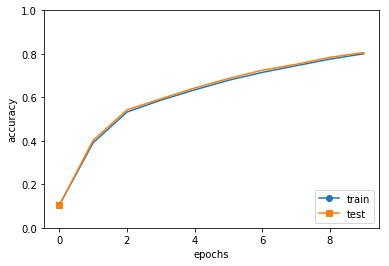

In [2]:
'''
    Please change only the hyper parameter below

    Hyper Parameter     Description                       Value(Example)
    ------------------  --------------------------------- -------------------
    hidden_size_list    Number of hidden layers and nodes [50, 100]
    activation          Hidden layer activation function  "sigmoid" | "relu"
    optimizer           Types of optimization methods     "SGD" | "Momentum" | "Nesterov" | "AdaGrad" | "RMSprop" | "Adam"
    epochs              Length of learning time           10 (Larger number takes longer time)
'''
hidden_size_list=[50, 100]
activation="sigmoid"
optimizer="SGD"
epochs=10

'''
    Please do not change below
'''
# Training==========
network = MultiLayerNetExtend(input_size=784, hidden_size_list=hidden_size_list, output_size=10, activation=activation)
trainer = Trainer2(network, x_train, t_train, x_test, t_test, epochs=epochs, mini_batch_size=100, optimizer=optimizer, optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# Draw graph==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()